In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
pd.set_option('display.max_row', 12)

In [3]:
speeches =  pd.read_csv('speeches.csv')
speeches['date'] = speeches['date'].apply(pd.to_datetime)

In [4]:
#only want speeches longer than 10 sentences (filters out some older proclamations that weren't actual speeches)
speeches = speeches[speeches['sentence_sentiment'].map(len) > 10]

In [5]:
pres_dates = speeches.groupby('president')['date'].apply(
    lambda x: sum(x.apply(lambda y: y.year)) // len(x)
    ).to_frame()['date']

# Word Length Trend

In [6]:
df = speeches.groupby('president').mean()
df['year'] = pres_dates

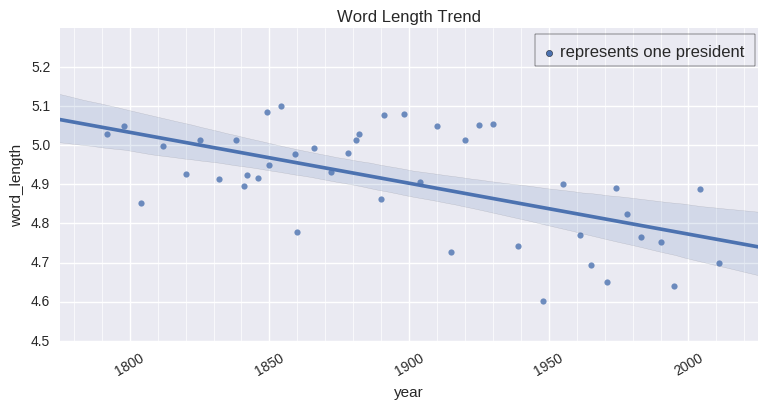

In [7]:
g = sns.FacetGrid(df, size=4, aspect=2)
g.map(sns.regplot, 'year', 'word_length')

g.ax.set_xlim(1775,2025)
g.ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
g.ax.grid(b=True, which='minor', color='w', linewidth=0.5)
g.set_xticklabels(rotation=30)

g.ax.set_title('Word Length Trend')

g.ax.text(.98, .95,'represents one president', ha='right', va='top', transform=g.ax.transAxes)
g.ax.scatter(.7, .92, c = sns.color_palette('deep', 1), transform=g.ax.transAxes)
g.ax.add_patch(
    mpl.patches.Rectangle(
        (0.68, 0.88),
        .315,
        .1,
        color='black',
        fill=False,
        transform=g.ax.transAxes
    ))

g.savefig('figs/word_length_trend.png', bbox_inches='tight')

# Sentence Length Trend

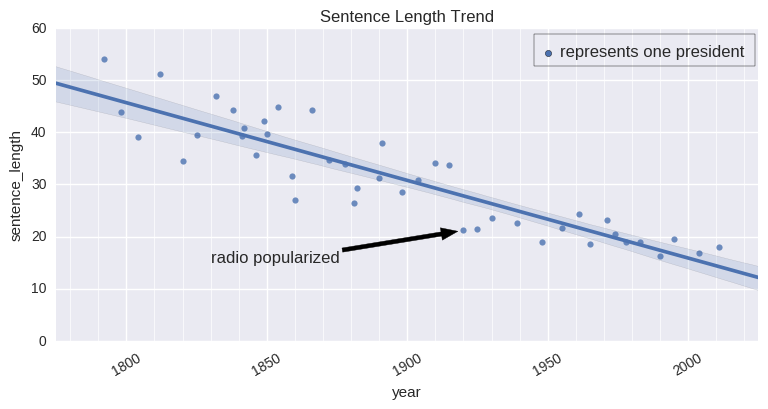

In [8]:
g = sns.FacetGrid(df, size=4, aspect=2)
g.map(sns.regplot, 'year', 'sentence_length')

g.ax.set_xlim(1775,2025)
g.ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
g.ax.grid(b=True, which='minor', color='w', linewidth=0.5)
g.set_xticklabels(rotation=30)

g.ax.set_title('Sentence Length Trend')

g.ax.annotate('radio popularized', xy=(1918, 21), xytext=(1830, 15),
              arrowprops=dict(facecolor='black', width=3, headwidth=9))

g.ax.text(.98, .95,'represents one president', ha='right', va='top', transform=g.ax.transAxes)
g.ax.scatter(.7, .92, c = sns.color_palette('deep', 1), transform=g.ax.transAxes)
g.ax.add_patch(
    mpl.patches.Rectangle(
        (0.68, 0.88),
        .315,
        .1,
        color='black',
        fill=False,
        transform=g.ax.transAxes
    ))

g.savefig('figs/sentence_length_trend.png', bbox_inches='tight')

# Buildup to Civil War

In [9]:
df.sort_values('year', inplace=True)
df['civil_war'] = 0
df.loc[4:16, ['civil_war']] = 1

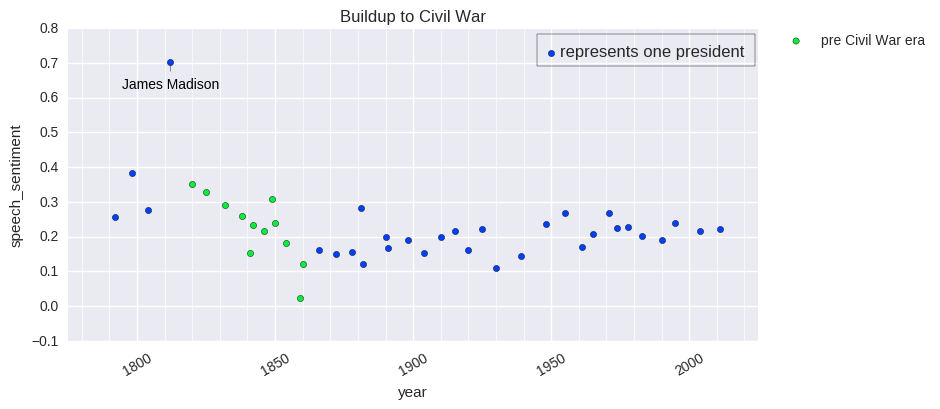

In [10]:
g = sns.FacetGrid(df, hue='civil_war', palette='bright', size=4, aspect=2)
g.map(plt.scatter, 'year', 'speech_sentiment', linewidths=.3, edgecolors='black')

g.ax.set_xlim(1775,2025)
g.ax.xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
g.ax.grid(b=True, which='minor', color='w', linewidth=0.5)
g.set_xticklabels(rotation=30)

g.ax.set_title('Buildup to Civil War')

g.ax.text(.98, .95,'represents one president', ha='right', va='top', transform=g.ax.transAxes)
g.ax.scatter(.7, .92, c = sns.color_palette('bright', 1), transform=g.ax.transAxes)
g.ax.add_patch(
    mpl.patches.Rectangle(
        (0.68, 0.88),
        .315,
        .1,
        color='black',
        fill=False,
        transform=g.ax.transAxes
    ))

handles, _ = g.ax.get_legend_handles_labels()
handles = [handles[1]]
labels = ['pre Civil War era']
g.ax.legend(handles, labels, borderaxespad=0., bbox_to_anchor=(1.25, 1));

x, y = df.loc['James Madison'][['year', 'speech_sentiment']]
ytext = y - .075
g.ax.annotate('James Madison', [x, y], [x, ytext], color='black',
              ha='center', size=10, arrowprops=dict(arrowstyle='-', color='black'))

g.savefig('figs/buildup_to_civil_war.png', bbox_inches='tight')